In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("art_coverage_by_country_clean-checkpoint.csv")

In [3]:
data

,Country,Reported number of people receiving ART,Estimated number of people living with HIV,Estimated ART coverage among people living with HIV (%),Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,920,7200[4100–11000],13[7–20],7200.0,4100.0,11000.0,13.0,7.0,20.0,Eastern Mediterranean
1,Albania,580,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,12800,16000[15000–17000],81[75–86],16000.0,15000.0,17000.0,81.0,75.0,86.0,Africa
3,Angola,88700,330000[290000–390000],27[23–31],330000.0,290000.0,390000.0,27.0,23.0,31.0,Africa
4,Argentina,85500,140000[130000–150000],61[55–67],140000.0,130000.0,150000.0,61.0,55.0,67.0,Americas
...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),Nodata,120000[100000–130000],Nodata,120000.0,100000.0,130000.0,NaN,NaN,NaN,Americas
166,Viet Nam,150000,230000[200000–260000],65[57–73],230000.0,200000.0,260000.0,65.0,57.0,73.0,Western Pacific
167,Yemen,2200,11000[6500–18000],21[12–35],11000.0,6500.0,18000.0,21.0,12.0,35.0,Eastern Mediterranean
168,Zambia,965000,1200000[1100000–1400000],78[69–88],1200000.0,1100000.0,1400000.0,78.0,69.0,88.0,Africa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         170 non-null    object 
 1   Reported number of people receiving ART                         170 non-null    object 
 2   Estimated number of people living with HIV                      170 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         170 non-null    object 
 4   Estimated number of people living with HIV_median               138 non-null    float64
 5   Estimated number of people living with HIV_min                  138 non-null    float64
 6   Estimated number of people living with HIV_max                  138 non-null    float64
 7   Estimated ART coverage among people living with HIV (

In [4]:
data['Estimated number of people living with HIV_median'] = data['Estimated number of people living with HIV_median'].fillna(data['Estimated number of people living with HIV_median'].median())
data['Estimated number of people living with HIV_min'] = data['Estimated number of people living with HIV_min'].fillna(data['Estimated number of people living with HIV_min'].median())
data['Estimated number of people living with HIV_max'] = data['Estimated number of people living with HIV_max'].fillna(data['Estimated number of people living with HIV_max'].median())
data['Estimated ART coverage among people living with HIV (%)_median'] = data['Estimated ART coverage among people living with HIV (%)_median'].fillna(data['Estimated ART coverage among people living with HIV (%)_median'].median())
data['Estimated ART coverage among people living with HIV (%)_min'] = data['Estimated ART coverage among people living with HIV (%)_min'].fillna(data['Estimated ART coverage among people living with HIV (%)_min'].median())
data['Estimated ART coverage among people living with HIV (%)_max'] = data['Estimated ART coverage among people living with HIV (%)_max'].fillna(data['Estimated ART coverage among people living with HIV (%)_max'].median())


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         170 non-null    object 
 1   Reported number of people receiving ART                         170 non-null    object 
 2   Estimated number of people living with HIV                      170 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         170 non-null    object 
 4   Estimated number of people living with HIV_median               170 non-null    float64
 5   Estimated number of people living with HIV_min                  170 non-null    float64
 6   Estimated number of people living with HIV_max                  170 non-null    float64
 7   Estimated ART coverage among people living with HIV (

In [6]:
data= pd.get_dummies(data, columns=['Country'], drop_first=True)


In [21]:
data= pd.get_dummies(data, columns=['Reported number of people receiving ART'], drop_first=True)
data= pd.get_dummies(data, columns=['Estimated number of people living with HIV'], drop_first=True)
data= pd.get_dummies(data, columns=['Estimated ART coverage among people living with HIV (%)'], drop_first=True)
data= pd.get_dummies(data, columns=['Estimated ART coverage among people living with HIV (%)_max'], drop_first=True)


KeyError: "None of [Index(['Reported number of people receiving ART'], dtype='object')] are in the [columns]"

In [ ]:
x= data.drop('WHO Region', axis=1)
y= data['WHO Region']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = model.predict(x_test)

In [15]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Accuracy : 0.20588235294117646

Rapport de classification :
                       precision    recall  f1-score   support

               Africa       0.00      0.00      0.00        10
             Americas       0.00      0.00      0.00         7
Eastern Mediterranean       0.00      0.00      0.00         4
               Europe       0.21      1.00      0.34         7
      South-East Asia       0.00      0.00      0.00         2
      Western Pacific       0.00      0.00      0.00         4

             accuracy                           0.21        34
            macro avg       0.03      0.17      0.06        34
         weighted avg       0.04      0.21      0.07        34



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


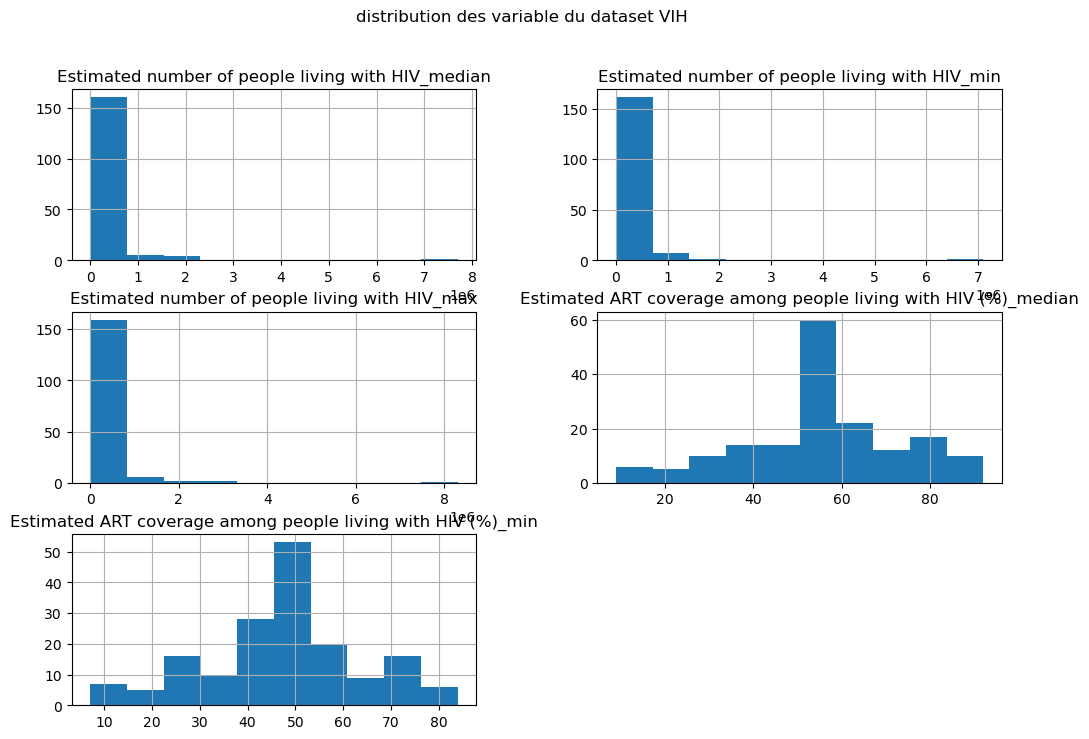

In [16]:
data.hist(figsize=(12, 8))
plt.suptitle("distribution des variable du dataset VIH")
plt.show()

In [17]:
print(data.columns)


Index(['Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_max',
       'Estimated ART coverage among people living with HIV (%)_median',
       'Estimated ART coverage among people living with HIV (%)_min',
       'WHO Region', 'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina',
       ...
       'Estimated ART coverage among people living with HIV (%)_max_85.0',
       'Estimated ART coverage among people living with HIV (%)_max_86.0',
       'Estimated ART coverage among people living with HIV (%)_max_87.0',
       'Estimated ART coverage among people living with HIV (%)_max_88.0',
       'Estimated ART coverage among people living with HIV (%)_max_89.0',
       'Estimated ART coverage among people living with HIV (%)_max_90.0',
       'Estimated ART coverage among people living with HIV (%)_max_92.0',
       'Estimated ART coverage among peopl

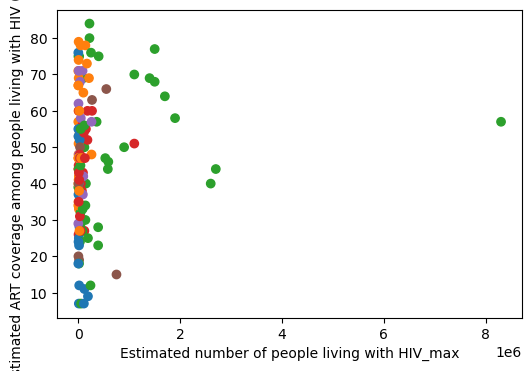

In [22]:
# Créer une palette de couleurs pour chaque région
palette = dict(zip(data["WHO Region"].unique(), sns.color_palette("tab10", len(data["WHO Region"].unique()))))

plt.figure(figsize=(6,4))
plt.scatter(
    data["Estimated number of people living with HIV_max"],
    data["Estimated ART coverage among people living with HIV (%)_min"],
    c=data["WHO Region"].map(palette)   # on mappe chaque région à une couleur
)
plt.xlabel("Estimated number of people living with HIV_max")
plt.ylabel("Estimated ART coverage among people living with HIV (%)_min")
plt.show()